In [85]:
#Imprting preprocessing libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [86]:
training_set=pd.read_csv('BTCtrain.csv')   #reading csv file

In [87]:
training_set.head()			   #print first five rows

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-07-16,0.04951,0.04951,0.04951,0.04951,0.04951,0
1,2010-07-17,0.04951,0.08585,0.05941,0.08584,0.08584,5
2,2010-07-18,0.08584,0.09307,0.07723,0.08080,0.08080,49
3,2010-07-19,0.08080,0.08181,0.07426,0.07474,0.07474,20
4,2010-07-20,0.07474,0.07921,0.06634,0.07921,0.07921,42


In [88]:
training_set1=training_set.iloc[:,1:] 	   #selecting the second column
training_set1.head()			   #print first five rows

,Open,High,Low,Close,Adj Close,Volume
0,0.04951,0.04951,0.04951,0.04951,0.04951,0
1,0.04951,0.08585,0.05941,0.08584,0.08584,5
2,0.08584,0.09307,0.07723,0.08080,0.08080,49
3,0.08080,0.08181,0.07426,0.07474,0.07474,20
4,0.07474,0.07921,0.06634,0.07921,0.07921,42


In [89]:
output = training_set.iloc[:, 1:2]
output = output.values

In [90]:
training_set1=training_set1.values	   #converting to 2d array
training_set1				   #print the whole data

array([[4.95100000e-02, 4.95100000e-02, 4.95100000e-02, 4.95100000e-02,
        4.95100000e-02, 0.00000000e+00],
       [4.95100000e-02, 8.58500000e-02, 5.94100000e-02, 8.58400000e-02,
        8.58400000e-02, 5.00000000e+00],
       [8.58400000e-02, 9.30700000e-02, 7.72300000e-02, 8.08000000e-02,
        8.08000000e-02, 4.90000000e+01],
       ...,
       [9.90604004e+03, 1.14178398e+04, 8.93870019e+03, 9.83786035e+03,
        9.83786035e+03, 2.41879236e+09],
       [9.84804981e+03, 1.06890596e+04, 9.02376953e+03, 9.94675977e+03,
        9.94675977e+03, 1.83621011e+09],
       [9.94708008e+03, 1.09427998e+04, 9.42092969e+03, 1.08614697e+04,
        1.08614697e+04, 1.35366960e+09]])

In [91]:
sc = MinMaxScaler()			   #scaling using normalisation 
training_set1 = sc.fit_transform(training_set1)

In [92]:
training_set1

array([[0.00000000e+00, 0.00000000e+00, 4.09931732e-06, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 3.18275244e-06, 5.12648111e-06, 3.34486644e-06,
        3.34486644e-06, 2.06714726e-09],
       [3.65234627e-06, 3.81509896e-06, 6.97537594e-06, 2.88083873e-06,
        2.88083873e-06, 2.02580432e-08],
       ...,
       [9.95874142e-01, 1.00000000e+00, 9.27424134e-01, 9.05757318e-01,
        9.05757318e-01, 1.00000000e+00],
       [9.90044238e-01, 9.36171514e-01, 9.36250411e-01, 9.15783577e-01,
        9.15783577e-01, 7.59143338e-01],
       [1.00000000e+00, 9.58394748e-01, 9.77457334e-01, 1.00000000e+00,
        1.00000000e+00, 5.59646880e-01]])

In [93]:
output = sc.fit_transform(output)

In [94]:
output

array([[0.00000000e+00],
       [0.00000000e+00],
       [3.65234627e-06],
       ...,
       [9.95874142e-01],
       [9.90044238e-01],
       [1.00000000e+00]])

In [95]:
xtrain=training_set1[0:2000]		   #input values of rows [0-2000]		   
ytrain=output[1:2001]

In [96]:
ytrain.shape

(2000, 1)

In [98]:
xtrain = np.reshape(xtrain, (2000, 6, 1))

In [99]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [100]:
regressor=Sequential()			#initialize the RNN


In [101]:
regressor.add(LSTM(units=4,activation='sigmoid',input_shape=(6, 1)))			#adding input layerand the LSTM layer 



In [102]:
regressor.add(Dense(units=1))		#ading output layers



In [103]:
regressor.compile(optimizer='adam',loss='mean_squared_error', metrics = ['accuracy']) 		#compiling the RNN



In [104]:
regressor.fit(xtrain,ytrain,batch_size=32,epochs=2500)		#fitting the RNN to the training set  



Epoch 1/2500
2000/2000 [==============================] - 1s 722us/step - loss: 0.0089 - acc: 5.0000e-04
Epoch 2/2500
2000/2000 [==============================] - 0s 235us/step - loss: 6.0538e-04 - acc: 5.0000e-04
Epoch 3/2500
2000/2000 [==============================] - 0s 238us/step - loss: 5.8349e-04 - acc: 5.0000e-04
Epoch 4/2500
2000/2000 [==============================] - 0s 234us/step - loss: 5.7686e-04 - acc: 5.0000e-04
Epoch 5/2500
2000/2000 [==============================] - 1s 267us/step - loss: 5.6902e-04 - acc: 5.0000e-04
Epoch 6/2500
2000/2000 [==============================] - 1s 271us/step - loss: 5.6047e-04 - acc: 5.0000e-04
Epoch 7/2500
2000/2000 [==============================] - 1s 255us/step - loss: 5.5333e-04 - acc: 5.0000e-04
Epoch 8/2500
2000/2000 [==============================] - 1s 295us/step - loss: 5.4432e-04 - acc: 5.0000e-04
Epoch 9/2500
2000/2000 [==============================] - 1s 277us/step - loss: 5.3653e-04 - acc: 5.0000e-04
Epoch 10/2500
2000/2000

2000/2000 [==============================] - 0s 233us/step - loss: 1.4087e-05 - acc: 5.0000e-04
Epoch 76/2500
2000/2000 [==============================] - 0s 227us/step - loss: 1.3432e-05 - acc: 5.0000e-04
Epoch 77/2500
2000/2000 [==============================] - 0s 230us/step - loss: 1.3039e-05 - acc: 5.0000e-04
Epoch 78/2500
2000/2000 [==============================] - 0s 229us/step - loss: 1.2642e-05 - acc: 5.0000e-04
Epoch 79/2500
2000/2000 [==============================] - 0s 229us/step - loss: 1.2103e-05 - acc: 5.0000e-04
Epoch 80/2500
2000/2000 [==============================] - 0s 229us/step - loss: 1.2184e-05 - acc: 5.0000e-04
Epoch 81/2500
2000/2000 [==============================] - 0s 227us/step - loss: 1.1388e-05 - acc: 5.0000e-04
Epoch 82/2500
2000/2000 [==============================] - 0s 230us/step - loss: 1.0970e-05 - acc: 5.0000e-04
Epoch 83/2500
2000/2000 [==============================] - 0s 229us/step - loss: 1.0561e-05 - acc: 5.0000e-04
Epoch 84/2500
2000/2000 

2000/2000 [==============================] - 0s 229us/step - loss: 4.0349e-07 - acc: 5.0000e-04
Epoch 150/2500
2000/2000 [==============================] - 0s 229us/step - loss: 3.8459e-07 - acc: 5.0000e-04
Epoch 151/2500
2000/2000 [==============================] - 0s 228us/step - loss: 4.3262e-07 - acc: 5.0000e-04
Epoch 152/2500
2000/2000 [==============================] - 0s 226us/step - loss: 3.7281e-07 - acc: 5.0000e-04
Epoch 153/2500
2000/2000 [==============================] - 0s 223us/step - loss: 3.5894e-07 - acc: 5.0000e-04
Epoch 154/2500
2000/2000 [==============================] - 0s 230us/step - loss: 3.6150e-07 - acc: 5.0000e-04
Epoch 155/2500
2000/2000 [==============================] - 0s 228us/step - loss: 3.3699e-07 - acc: 5.0000e-04
Epoch 156/2500
2000/2000 [==============================] - 0s 240us/step - loss: 3.7668e-07 - acc: 5.0000e-04
Epoch 157/2500
2000/2000 [==============================] - 0s 228us/step - loss: 4.0972e-07 - acc: 5.0000e-04
Epoch 158/2500
2

2000/2000 [==============================] - 0s 231us/step - loss: 3.4327e-07 - acc: 5.0000e-04
Epoch 223/2500
2000/2000 [==============================] - 0s 226us/step - loss: 3.2878e-07 - acc: 5.0000e-04
Epoch 224/2500
2000/2000 [==============================] - 0s 230us/step - loss: 2.8995e-07 - acc: 5.0000e-04
Epoch 225/2500
2000/2000 [==============================] - 0s 234us/step - loss: 2.6179e-07 - acc: 5.0000e-04
Epoch 226/2500
2000/2000 [==============================] - 0s 233us/step - loss: 3.0776e-07 - acc: 5.0000e-04
Epoch 227/2500
2000/2000 [==============================] - 0s 232us/step - loss: 2.6884e-07 - acc: 5.0000e-04
Epoch 228/2500
2000/2000 [==============================] - 0s 228us/step - loss: 3.1890e-07 - acc: 5.0000e-04
Epoch 229/2500
2000/2000 [==============================] - 0s 232us/step - loss: 3.0834e-07 - acc: 5.0000e-04
Epoch 230/2500
2000/2000 [==============================] - 0s 230us/step - loss: 3.9227e-07 - acc: 5.0000e-04
Epoch 231/2500
2

2000/2000 [==============================] - 0s 231us/step - loss: 2.9528e-07 - acc: 5.0000e-04
Epoch 296/2500
2000/2000 [==============================] - 0s 227us/step - loss: 2.7818e-07 - acc: 5.0000e-04
Epoch 297/2500
2000/2000 [==============================] - 0s 231us/step - loss: 3.1952e-07 - acc: 5.0000e-04
Epoch 298/2500
2000/2000 [==============================] - 0s 229us/step - loss: 3.1654e-07 - acc: 5.0000e-04
Epoch 299/2500
2000/2000 [==============================] - 0s 231us/step - loss: 2.8339e-07 - acc: 5.0000e-04
Epoch 300/2500
2000/2000 [==============================] - 0s 229us/step - loss: 3.1631e-07 - acc: 5.0000e-04
Epoch 301/2500
2000/2000 [==============================] - 0s 231us/step - loss: 3.2693e-07 - acc: 5.0000e-04
Epoch 302/2500
2000/2000 [==============================] - 0s 229us/step - loss: 2.8814e-07 - acc: 5.0000e-04
Epoch 303/2500
2000/2000 [==============================] - 0s 231us/step - loss: 3.5209e-07 - acc: 5.0000e-04
Epoch 304/2500
2

Epoch 369/2500
2000/2000 [==============================] - 0s 239us/step - loss: 3.5251e-07 - acc: 5.0000e-04
Epoch 370/2500
2000/2000 [==============================] - 0s 228us/step - loss: 2.4992e-07 - acc: 5.0000e-04
Epoch 371/2500
2000/2000 [==============================] - 0s 230us/step - loss: 2.4017e-07 - acc: 5.0000e-04
Epoch 372/2500
2000/2000 [==============================] - 0s 232us/step - loss: 2.6350e-07 - acc: 5.0000e-04
Epoch 373/2500
2000/2000 [==============================] - 0s 229us/step - loss: 2.6843e-07 - acc: 5.0000e-04
Epoch 374/2500
2000/2000 [==============================] - 0s 229us/step - loss: 2.6706e-07 - acc: 5.0000e-04
Epoch 375/2500
2000/2000 [==============================] - 0s 223us/step - loss: 2.7181e-07 - acc: 5.0000e-04
Epoch 376/2500
2000/2000 [==============================] - 0s 233us/step - loss: 2.4950e-07 - acc: 5.0000e-04
Epoch 377/2500
2000/2000 [==============================] - 0s 229us/step - loss: 3.0719e-07 - acc: 5.0000e-04
E

2000/2000 [==============================] - 0s 226us/step - loss: 3.3044e-07 - acc: 5.0000e-04
Epoch 443/2500
2000/2000 [==============================] - 0s 229us/step - loss: 3.1894e-07 - acc: 5.0000e-04
Epoch 444/2500
2000/2000 [==============================] - 0s 232us/step - loss: 2.6677e-07 - acc: 5.0000e-04
Epoch 445/2500
2000/2000 [==============================] - 0s 231us/step - loss: 2.8672e-07 - acc: 5.0000e-04
Epoch 446/2500
2000/2000 [==============================] - 0s 229us/step - loss: 2.6665e-07 - acc: 5.0000e-04
Epoch 447/2500
2000/2000 [==============================] - 0s 229us/step - loss: 3.0023e-07 - acc: 5.0000e-04
Epoch 448/2500
2000/2000 [==============================] - 0s 228us/step - loss: 2.6366e-07 - acc: 5.0000e-04
Epoch 449/2500
2000/2000 [==============================] - 0s 232us/step - loss: 2.6996e-07 - acc: 5.0000e-04
Epoch 450/2500
2000/2000 [==============================] - 0s 229us/step - loss: 2.2305e-07 - acc: 5.0000e-04
Epoch 451/2500
2

Epoch 516/2500
2000/2000 [==============================] - 0s 227us/step - loss: 2.5729e-07 - acc: 5.0000e-04
Epoch 517/2500
2000/2000 [==============================] - 0s 230us/step - loss: 3.4571e-07 - acc: 5.0000e-04
Epoch 518/2500
2000/2000 [==============================] - 0s 229us/step - loss: 2.4509e-07 - acc: 5.0000e-04
Epoch 519/2500
2000/2000 [==============================] - 0s 233us/step - loss: 2.4768e-07 - acc: 5.0000e-04
Epoch 520/2500
2000/2000 [==============================] - 0s 229us/step - loss: 3.7178e-07 - acc: 5.0000e-04
Epoch 521/2500
2000/2000 [==============================] - 0s 232us/step - loss: 5.3029e-07 - acc: 5.0000e-04
Epoch 522/2500
2000/2000 [==============================] - 0s 227us/step - loss: 2.3382e-07 - acc: 5.0000e-04
Epoch 523/2500
2000/2000 [==============================] - 0s 224us/step - loss: 2.2947e-07 - acc: 5.0000e-04
Epoch 524/2500
2000/2000 [==============================] - 0s 228us/step - loss: 2.4939e-07 - acc: 5.0000e-04
E

2000/2000 [==============================] - 0s 232us/step - loss: 2.7195e-07 - acc: 5.0000e-04
Epoch 590/2500
2000/2000 [==============================] - 0s 228us/step - loss: 3.4043e-07 - acc: 5.0000e-04
Epoch 591/2500
2000/2000 [==============================] - 0s 237us/step - loss: 2.8991e-07 - acc: 5.0000e-04
Epoch 592/2500
2000/2000 [==============================] - 0s 226us/step - loss: 4.0944e-07 - acc: 5.0000e-04
Epoch 593/2500
2000/2000 [==============================] - 0s 229us/step - loss: 2.3158e-07 - acc: 5.0000e-04
Epoch 594/2500
2000/2000 [==============================] - 0s 229us/step - loss: 2.3079e-07 - acc: 5.0000e-04
Epoch 595/2500
2000/2000 [==============================] - 0s 228us/step - loss: 3.4709e-07 - acc: 5.0000e-04
Epoch 596/2500
2000/2000 [==============================] - 0s 227us/step - loss: 2.8832e-07 - acc: 5.0000e-04
Epoch 597/2500
2000/2000 [==============================] - 0s 228us/step - loss: 2.2964e-07 - acc: 5.0000e-04
Epoch 598/2500
2

2000/2000 [==============================] - 0s 229us/step - loss: 3.2788e-07 - acc: 5.0000e-04
Epoch 663/2500
2000/2000 [==============================] - 0s 232us/step - loss: 2.7262e-07 - acc: 5.0000e-04
Epoch 664/2500
2000/2000 [==============================] - 0s 232us/step - loss: 2.4964e-07 - acc: 5.0000e-04
Epoch 665/2500
2000/2000 [==============================] - 0s 229us/step - loss: 2.2640e-07 - acc: 5.0000e-04
Epoch 666/2500
2000/2000 [==============================] - 0s 229us/step - loss: 2.5204e-07 - acc: 5.0000e-04
Epoch 667/2500
2000/2000 [==============================] - 0s 225us/step - loss: 2.2213e-07 - acc: 5.0000e-04
Epoch 668/2500
2000/2000 [==============================] - 0s 231us/step - loss: 2.0800e-07 - acc: 5.0000e-04
Epoch 669/2500
2000/2000 [==============================] - 0s 228us/step - loss: 2.6065e-07 - acc: 5.0000e-04
Epoch 670/2500
2000/2000 [==============================] - 0s 226us/step - loss: 2.3871e-07 - acc: 5.0000e-04
Epoch 671/2500
2

Epoch 736/2500
2000/2000 [==============================] - 0s 234us/step - loss: 2.4323e-07 - acc: 5.0000e-04
Epoch 737/2500
2000/2000 [==============================] - 0s 229us/step - loss: 2.3945e-07 - acc: 5.0000e-04
Epoch 738/2500
2000/2000 [==============================] - 0s 231us/step - loss: 2.1658e-07 - acc: 5.0000e-04
Epoch 739/2500
2000/2000 [==============================] - 0s 230us/step - loss: 2.4276e-07 - acc: 5.0000e-04
Epoch 740/2500
2000/2000 [==============================] - 0s 227us/step - loss: 2.0385e-07 - acc: 5.0000e-04
Epoch 741/2500
2000/2000 [==============================] - 0s 230us/step - loss: 2.2996e-07 - acc: 5.0000e-04
Epoch 742/2500
2000/2000 [==============================] - 0s 229us/step - loss: 2.2865e-07 - acc: 5.0000e-04
Epoch 743/2500
2000/2000 [==============================] - 0s 235us/step - loss: 2.1145e-07 - acc: 5.0000e-04
Epoch 744/2500
2000/2000 [==============================] - 0s 229us/step - loss: 2.5879e-07 - acc: 5.0000e-04
E

2000/2000 [==============================] - 0s 230us/step - loss: 2.2414e-07 - acc: 5.0000e-04
Epoch 810/2500
2000/2000 [==============================] - 0s 229us/step - loss: 2.1329e-07 - acc: 5.0000e-04
Epoch 811/2500
2000/2000 [==============================] - 0s 230us/step - loss: 2.1216e-07 - acc: 5.0000e-04
Epoch 812/2500
2000/2000 [==============================] - 0s 229us/step - loss: 3.0402e-07 - acc: 5.0000e-04
Epoch 813/2500
2000/2000 [==============================] - 0s 232us/step - loss: 2.2455e-07 - acc: 5.0000e-04
Epoch 814/2500
2000/2000 [==============================] - 0s 232us/step - loss: 2.3073e-07 - acc: 5.0000e-04
Epoch 815/2500
2000/2000 [==============================] - 0s 231us/step - loss: 2.9119e-07 - acc: 5.0000e-04
Epoch 816/2500
2000/2000 [==============================] - 0s 229us/step - loss: 2.8696e-07 - acc: 5.0000e-04
Epoch 817/2500
2000/2000 [==============================] - 0s 226us/step - loss: 2.0965e-07 - acc: 5.0000e-04
Epoch 818/2500
2

Epoch 883/2500
2000/2000 [==============================] - 0s 231us/step - loss: 2.3491e-07 - acc: 5.0000e-04
Epoch 884/2500
2000/2000 [==============================] - 0s 224us/step - loss: 2.2917e-07 - acc: 5.0000e-04
Epoch 885/2500
2000/2000 [==============================] - 0s 227us/step - loss: 2.4474e-07 - acc: 5.0000e-04
Epoch 886/2500
2000/2000 [==============================] - 0s 229us/step - loss: 2.3840e-07 - acc: 5.0000e-04
Epoch 887/2500
2000/2000 [==============================] - 0s 229us/step - loss: 2.2396e-07 - acc: 5.0000e-04
Epoch 888/2500
2000/2000 [==============================] - 0s 230us/step - loss: 2.3050e-07 - acc: 5.0000e-04
Epoch 889/2500
2000/2000 [==============================] - 0s 229us/step - loss: 2.1869e-07 - acc: 5.0000e-04
Epoch 890/2500
2000/2000 [==============================] - 0s 231us/step - loss: 2.3427e-07 - acc: 5.0000e-04
Epoch 891/2500
2000/2000 [==============================] - 0s 233us/step - loss: 1.9008e-07 - acc: 5.0000e-04
E

2000/2000 [==============================] - 0s 231us/step - loss: 1.8012e-07 - acc: 5.0000e-04
Epoch 957/2500
2000/2000 [==============================] - 0s 230us/step - loss: 2.1320e-07 - acc: 5.0000e-04
Epoch 958/2500
2000/2000 [==============================] - 0s 229us/step - loss: 2.2296e-07 - acc: 5.0000e-04
Epoch 959/2500
2000/2000 [==============================] - 0s 229us/step - loss: 1.9690e-07 - acc: 5.0000e-04
Epoch 960/2500
2000/2000 [==============================] - 0s 227us/step - loss: 2.6960e-07 - acc: 5.0000e-04
Epoch 961/2500
2000/2000 [==============================] - 0s 234us/step - loss: 2.5630e-07 - acc: 5.0000e-04
Epoch 962/2500
2000/2000 [==============================] - 0s 228us/step - loss: 2.2337e-07 - acc: 5.0000e-04
Epoch 963/2500
2000/2000 [==============================] - 0s 230us/step - loss: 2.8645e-07 - acc: 5.0000e-04
Epoch 964/2500
2000/2000 [==============================] - 0s 231us/step - loss: 2.2063e-07 - acc: 5.0000e-04
Epoch 965/2500
2

2000/2000 [==============================] - 0s 231us/step - loss: 1.9765e-07 - acc: 5.0000e-04
Epoch 1030/2500
2000/2000 [==============================] - 0s 230us/step - loss: 2.2261e-07 - acc: 5.0000e-04
Epoch 1031/2500
2000/2000 [==============================] - 0s 233us/step - loss: 1.9748e-07 - acc: 5.0000e-04
Epoch 1032/2500
2000/2000 [==============================] - 0s 228us/step - loss: 3.1417e-07 - acc: 5.0000e-04
Epoch 1033/2500
2000/2000 [==============================] - 0s 233us/step - loss: 2.1775e-07 - acc: 5.0000e-04
Epoch 1034/2500
2000/2000 [==============================] - 0s 230us/step - loss: 1.9147e-07 - acc: 5.0000e-04
Epoch 1035/2500
2000/2000 [==============================] - 0s 227us/step - loss: 2.4824e-07 - acc: 5.0000e-04
Epoch 1036/2500
2000/2000 [==============================] - 0s 227us/step - loss: 1.8736e-07 - acc: 5.0000e-04
Epoch 1037/2500
2000/2000 [==============================] - 0s 229us/step - loss: 1.8417e-07 - acc: 5.0000e-04
Epoch 10

2000/2000 [==============================] - 0s 231us/step - loss: 2.1033e-07 - acc: 5.0000e-04
Epoch 1102/2500
2000/2000 [==============================] - 0s 232us/step - loss: 2.3662e-07 - acc: 5.0000e-04
Epoch 1103/2500
2000/2000 [==============================] - 0s 236us/step - loss: 2.4456e-07 - acc: 5.0000e-04
Epoch 1104/2500
2000/2000 [==============================] - 0s 234us/step - loss: 2.7470e-07 - acc: 5.0000e-04
Epoch 1105/2500
2000/2000 [==============================] - 0s 228us/step - loss: 1.9657e-07 - acc: 5.0000e-04
Epoch 1106/2500
2000/2000 [==============================] - 0s 233us/step - loss: 1.7028e-07 - acc: 5.0000e-04
Epoch 1107/2500
2000/2000 [==============================] - 0s 228us/step - loss: 1.8653e-07 - acc: 5.0000e-04
Epoch 1108/2500
2000/2000 [==============================] - 0s 232us/step - loss: 2.1487e-07 - acc: 5.0000e-04
Epoch 1109/2500
2000/2000 [==============================] - 0s 229us/step - loss: 1.7379e-07 - acc: 5.0000e-04
Epoch 11

Epoch 1174/2500
2000/2000 [==============================] - 0s 229us/step - loss: 1.7629e-07 - acc: 5.0000e-04
Epoch 1175/2500
2000/2000 [==============================] - 0s 231us/step - loss: 1.7955e-07 - acc: 5.0000e-04
Epoch 1176/2500
2000/2000 [==============================] - 0s 227us/step - loss: 1.6679e-07 - acc: 5.0000e-04
Epoch 1177/2500
2000/2000 [==============================] - 0s 230us/step - loss: 2.0134e-07 - acc: 5.0000e-04
Epoch 1178/2500
2000/2000 [==============================] - 0s 229us/step - loss: 2.0011e-07 - acc: 5.0000e-04
Epoch 1179/2500
2000/2000 [==============================] - 0s 227us/step - loss: 2.1650e-07 - acc: 5.0000e-04
Epoch 1180/2500
2000/2000 [==============================] - 0s 225us/step - loss: 1.9718e-07 - acc: 5.0000e-04
Epoch 1181/2500
2000/2000 [==============================] - 0s 234us/step - loss: 1.9921e-07 - acc: 5.0000e-04
Epoch 1182/2500
2000/2000 [==============================] - 0s 230us/step - loss: 1.9624e-07 - acc: 5.0

2000/2000 [==============================] - 0s 232us/step - loss: 1.5647e-07 - acc: 5.0000e-04
Epoch 1248/2500
2000/2000 [==============================] - 0s 226us/step - loss: 1.6543e-07 - acc: 5.0000e-04
Epoch 1249/2500
2000/2000 [==============================] - 0s 230us/step - loss: 1.7941e-07 - acc: 5.0000e-04
Epoch 1250/2500
2000/2000 [==============================] - 0s 230us/step - loss: 1.7792e-07 - acc: 5.0000e-04
Epoch 1251/2500
2000/2000 [==============================] - 0s 232us/step - loss: 1.9090e-07 - acc: 5.0000e-04
Epoch 1252/2500
2000/2000 [==============================] - 0s 229us/step - loss: 1.5183e-07 - acc: 5.0000e-04
Epoch 1253/2500
2000/2000 [==============================] - 0s 235us/step - loss: 2.6803e-07 - acc: 5.0000e-04
Epoch 1254/2500
2000/2000 [==============================] - 0s 232us/step - loss: 1.7253e-07 - acc: 5.0000e-04
Epoch 1255/2500
2000/2000 [==============================] - 0s 228us/step - loss: 1.8186e-07 - acc: 5.0000e-04
Epoch 12

2000/2000 [==============================] - 0s 229us/step - loss: 1.6011e-07 - acc: 5.0000e-04
Epoch 1321/2500
2000/2000 [==============================] - 0s 229us/step - loss: 1.5600e-07 - acc: 5.0000e-04
Epoch 1322/2500
2000/2000 [==============================] - 0s 226us/step - loss: 1.9369e-07 - acc: 5.0000e-04
Epoch 1323/2500
2000/2000 [==============================] - 0s 230us/step - loss: 1.6368e-07 - acc: 5.0000e-04
Epoch 1324/2500
2000/2000 [==============================] - 0s 231us/step - loss: 1.9677e-07 - acc: 5.0000e-04
Epoch 1325/2500
2000/2000 [==============================] - 0s 233us/step - loss: 1.9537e-07 - acc: 5.0000e-04
Epoch 1326/2500
2000/2000 [==============================] - 0s 233us/step - loss: 1.7688e-07 - acc: 5.0000e-04
Epoch 1327/2500
2000/2000 [==============================] - 0s 230us/step - loss: 1.9657e-07 - acc: 5.0000e-04
Epoch 1328/2500
2000/2000 [==============================] - 0s 234us/step - loss: 1.7412e-07 - acc: 5.0000e-04
Epoch 13

2000/2000 [==============================] - 0s 233us/step - loss: 1.9797e-07 - acc: 5.0000e-04
Epoch 1394/2500
2000/2000 [==============================] - 0s 230us/step - loss: 1.4866e-07 - acc: 5.0000e-04
Epoch 1395/2500
2000/2000 [==============================] - 0s 230us/step - loss: 1.6427e-07 - acc: 5.0000e-04
Epoch 1396/2500
2000/2000 [==============================] - 0s 242us/step - loss: 1.7110e-07 - acc: 5.0000e-04
Epoch 1397/2500
2000/2000 [==============================] - 0s 228us/step - loss: 1.9170e-07 - acc: 5.0000e-04
Epoch 1398/2500
2000/2000 [==============================] - 0s 232us/step - loss: 1.8085e-07 - acc: 5.0000e-04
Epoch 1399/2500
2000/2000 [==============================] - 0s 234us/step - loss: 1.5095e-07 - acc: 5.0000e-04
Epoch 1400/2500
2000/2000 [==============================] - 1s 251us/step - loss: 1.7846e-07 - acc: 5.0000e-04
Epoch 1401/2500
2000/2000 [==============================] - 0s 237us/step - loss: 1.7378e-07 - acc: 5.0000e-04
Epoch 14

2000/2000 [==============================] - 0s 231us/step - loss: 2.2218e-07 - acc: 5.0000e-04
Epoch 1467/2500
2000/2000 [==============================] - 0s 226us/step - loss: 1.6454e-07 - acc: 5.0000e-04
Epoch 1468/2500
2000/2000 [==============================] - 0s 230us/step - loss: 1.3401e-07 - acc: 5.0000e-04
Epoch 1469/2500
2000/2000 [==============================] - 0s 227us/step - loss: 1.6563e-07 - acc: 5.0000e-04
Epoch 1470/2500
2000/2000 [==============================] - 0s 228us/step - loss: 1.5471e-07 - acc: 5.0000e-04
Epoch 1471/2500
2000/2000 [==============================] - 0s 232us/step - loss: 1.9453e-07 - acc: 5.0000e-04
Epoch 1472/2500
2000/2000 [==============================] - 0s 228us/step - loss: 1.6576e-07 - acc: 5.0000e-04
Epoch 1473/2500
2000/2000 [==============================] - 0s 229us/step - loss: 1.7958e-07 - acc: 5.0000e-04
Epoch 1474/2500
2000/2000 [==============================] - 0s 229us/step - loss: 2.6509e-07 - acc: 5.0000e-04
Epoch 14

2000/2000 [==============================] - 0s 229us/step - loss: 1.4706e-07 - acc: 5.0000e-04
Epoch 1539/2500
2000/2000 [==============================] - 0s 235us/step - loss: 1.8019e-07 - acc: 5.0000e-04
Epoch 1540/2500
2000/2000 [==============================] - 0s 232us/step - loss: 2.2499e-07 - acc: 5.0000e-04
Epoch 1541/2500
2000/2000 [==============================] - 0s 229us/step - loss: 1.5069e-07 - acc: 5.0000e-04
Epoch 1542/2500
2000/2000 [==============================] - 0s 227us/step - loss: 1.8521e-07 - acc: 5.0000e-04
Epoch 1543/2500
2000/2000 [==============================] - 0s 231us/step - loss: 1.4743e-07 - acc: 5.0000e-04
Epoch 1544/2500
2000/2000 [==============================] - 0s 226us/step - loss: 1.5447e-07 - acc: 5.0000e-04
Epoch 1545/2500
2000/2000 [==============================] - 0s 230us/step - loss: 1.2848e-07 - acc: 5.0000e-04
Epoch 1546/2500
2000/2000 [==============================] - 0s 231us/step - loss: 1.5459e-07 - acc: 5.0000e-04
Epoch 15

2000/2000 [==============================] - 0s 231us/step - loss: 1.5231e-07 - acc: 5.0000e-04
Epoch 1611/2500
2000/2000 [==============================] - 0s 229us/step - loss: 1.4808e-07 - acc: 5.0000e-04
Epoch 1612/2500
2000/2000 [==============================] - 0s 226us/step - loss: 2.0032e-07 - acc: 5.0000e-04
Epoch 1613/2500
2000/2000 [==============================] - 0s 227us/step - loss: 1.3722e-07 - acc: 5.0000e-04
Epoch 1614/2500
2000/2000 [==============================] - 0s 232us/step - loss: 1.5353e-07 - acc: 5.0000e-04
Epoch 1615/2500
2000/2000 [==============================] - 0s 226us/step - loss: 1.5301e-07 - acc: 5.0000e-04
Epoch 1616/2500
2000/2000 [==============================] - 0s 230us/step - loss: 1.4627e-07 - acc: 5.0000e-04
Epoch 1617/2500
2000/2000 [==============================] - 0s 229us/step - loss: 1.4957e-07 - acc: 5.0000e-04
Epoch 1618/2500
2000/2000 [==============================] - 0s 230us/step - loss: 1.4612e-07 - acc: 5.0000e-04
Epoch 16

2000/2000 [==============================] - 0s 228us/step - loss: 1.4946e-07 - acc: 5.0000e-04
Epoch 1684/2500
2000/2000 [==============================] - 0s 231us/step - loss: 1.6919e-07 - acc: 5.0000e-04
Epoch 1685/2500
2000/2000 [==============================] - 0s 228us/step - loss: 1.8375e-07 - acc: 5.0000e-04
Epoch 1686/2500
2000/2000 [==============================] - 0s 231us/step - loss: 1.6883e-07 - acc: 5.0000e-04
Epoch 1687/2500
2000/2000 [==============================] - 0s 232us/step - loss: 1.3751e-07 - acc: 5.0000e-04
Epoch 1688/2500
2000/2000 [==============================] - 0s 231us/step - loss: 1.2726e-07 - acc: 5.0000e-04
Epoch 1689/2500
2000/2000 [==============================] - 0s 233us/step - loss: 1.3310e-07 - acc: 5.0000e-04
Epoch 1690/2500
2000/2000 [==============================] - 0s 231us/step - loss: 1.5114e-07 - acc: 5.0000e-04
Epoch 1691/2500
2000/2000 [==============================] - 0s 229us/step - loss: 1.2758e-07 - acc: 5.0000e-04
Epoch 16

2000/2000 [==============================] - 0s 230us/step - loss: 1.9647e-07 - acc: 5.0000e-04
Epoch 1757/2500
2000/2000 [==============================] - 0s 229us/step - loss: 1.6397e-07 - acc: 5.0000e-04
Epoch 1758/2500
2000/2000 [==============================] - 0s 227us/step - loss: 1.4455e-07 - acc: 5.0000e-04
Epoch 1759/2500
2000/2000 [==============================] - 0s 230us/step - loss: 1.5825e-07 - acc: 5.0000e-04
Epoch 1760/2500
2000/2000 [==============================] - 0s 230us/step - loss: 1.9263e-07 - acc: 5.0000e-04
Epoch 1761/2500
2000/2000 [==============================] - 0s 238us/step - loss: 1.2437e-07 - acc: 5.0000e-04
Epoch 1762/2500
2000/2000 [==============================] - 0s 234us/step - loss: 1.2529e-07 - acc: 5.0000e-04
Epoch 1763/2500
2000/2000 [==============================] - 0s 233us/step - loss: 1.3256e-07 - acc: 5.0000e-04
Epoch 1764/2500
2000/2000 [==============================] - 0s 226us/step - loss: 1.7745e-07 - acc: 5.0000e-04
Epoch 17

2000/2000 [==============================] - 0s 229us/step - loss: 1.1550e-07 - acc: 5.0000e-04
Epoch 1829/2500
2000/2000 [==============================] - 0s 227us/step - loss: 1.6273e-07 - acc: 5.0000e-04
Epoch 1830/2500
2000/2000 [==============================] - 0s 225us/step - loss: 1.3089e-07 - acc: 5.0000e-04
Epoch 1831/2500
2000/2000 [==============================] - 0s 230us/step - loss: 2.3348e-07 - acc: 5.0000e-04
Epoch 1832/2500
2000/2000 [==============================] - 0s 228us/step - loss: 1.2083e-07 - acc: 5.0000e-04
Epoch 1833/2500
2000/2000 [==============================] - 0s 225us/step - loss: 1.1521e-07 - acc: 5.0000e-04
Epoch 1834/2500
2000/2000 [==============================] - 0s 230us/step - loss: 1.2770e-07 - acc: 5.0000e-04
Epoch 1835/2500
2000/2000 [==============================] - 0s 227us/step - loss: 1.2816e-07 - acc: 5.0000e-04
Epoch 1836/2500
2000/2000 [==============================] - 0s 226us/step - loss: 1.1306e-07 - acc: 5.0000e-04
Epoch 18

2000/2000 [==============================] - 0s 231us/step - loss: 1.7559e-07 - acc: 5.0000e-04
Epoch 1902/2500
2000/2000 [==============================] - 0s 233us/step - loss: 1.2016e-07 - acc: 5.0000e-04
Epoch 1903/2500
2000/2000 [==============================] - 0s 230us/step - loss: 1.5133e-07 - acc: 5.0000e-04
Epoch 1904/2500
2000/2000 [==============================] - 0s 231us/step - loss: 1.3894e-07 - acc: 5.0000e-04
Epoch 1905/2500
2000/2000 [==============================] - 0s 229us/step - loss: 1.2497e-07 - acc: 5.0000e-04
Epoch 1906/2500
2000/2000 [==============================] - 0s 231us/step - loss: 1.4859e-07 - acc: 5.0000e-04
Epoch 1907/2500
2000/2000 [==============================] - 0s 230us/step - loss: 1.7010e-07 - acc: 5.0000e-04
Epoch 1908/2500
2000/2000 [==============================] - 0s 230us/step - loss: 1.2813e-07 - acc: 5.0000e-04
Epoch 1909/2500
2000/2000 [==============================] - 0s 235us/step - loss: 1.5858e-07 - acc: 5.0000e-04
Epoch 19

2000/2000 [==============================] - 0s 232us/step - loss: 9.9465e-08 - acc: 5.0000e-04
Epoch 1975/2500
2000/2000 [==============================] - 0s 228us/step - loss: 1.2230e-07 - acc: 5.0000e-04
Epoch 1976/2500
2000/2000 [==============================] - 0s 229us/step - loss: 1.6970e-07 - acc: 5.0000e-04
Epoch 1977/2500
2000/2000 [==============================] - 0s 228us/step - loss: 1.4845e-07 - acc: 5.0000e-04
Epoch 1978/2500
2000/2000 [==============================] - 0s 227us/step - loss: 1.3188e-07 - acc: 5.0000e-04
Epoch 1979/2500
2000/2000 [==============================] - 0s 230us/step - loss: 1.4733e-07 - acc: 5.0000e-04
Epoch 1980/2500
2000/2000 [==============================] - 0s 223us/step - loss: 1.0598e-07 - acc: 5.0000e-04
Epoch 1981/2500
2000/2000 [==============================] - 0s 232us/step - loss: 1.3032e-07 - acc: 5.0000e-04
Epoch 1982/2500
2000/2000 [==============================] - 0s 227us/step - loss: 1.1021e-07 - acc: 5.0000e-04
Epoch 19

2000/2000 [==============================] - 0s 230us/step - loss: 1.0238e-07 - acc: 5.0000e-04
Epoch 2048/2500
2000/2000 [==============================] - 0s 230us/step - loss: 1.0787e-07 - acc: 5.0000e-04
Epoch 2049/2500
2000/2000 [==============================] - 0s 232us/step - loss: 1.3820e-07 - acc: 5.0000e-04
Epoch 2050/2500
2000/2000 [==============================] - 0s 226us/step - loss: 1.2279e-07 - acc: 5.0000e-04
Epoch 2051/2500
2000/2000 [==============================] - 0s 226us/step - loss: 1.1798e-07 - acc: 5.0000e-04
Epoch 2052/2500
2000/2000 [==============================] - 0s 229us/step - loss: 1.0257e-07 - acc: 5.0000e-04
Epoch 2053/2500
2000/2000 [==============================] - 0s 223us/step - loss: 1.3097e-07 - acc: 5.0000e-04
Epoch 2054/2500
2000/2000 [==============================] - 0s 231us/step - loss: 1.5580e-07 - acc: 5.0000e-04
Epoch 2055/2500
2000/2000 [==============================] - 0s 224us/step - loss: 1.3250e-07 - acc: 5.0000e-04
Epoch 20

2000/2000 [==============================] - 0s 234us/step - loss: 1.2766e-07 - acc: 5.0000e-04
Epoch 2121/2500
2000/2000 [==============================] - 0s 230us/step - loss: 9.2816e-08 - acc: 5.0000e-04
Epoch 2122/2500
2000/2000 [==============================] - 0s 231us/step - loss: 1.1264e-07 - acc: 5.0000e-04
Epoch 2123/2500
2000/2000 [==============================] - 0s 228us/step - loss: 1.6144e-07 - acc: 5.0000e-04
Epoch 2124/2500
2000/2000 [==============================] - 0s 232us/step - loss: 1.0367e-07 - acc: 5.0000e-04
Epoch 2125/2500
2000/2000 [==============================] - 0s 229us/step - loss: 1.1374e-07 - acc: 5.0000e-04
Epoch 2126/2500
2000/2000 [==============================] - 0s 231us/step - loss: 1.3791e-07 - acc: 5.0000e-04
Epoch 2127/2500
2000/2000 [==============================] - 0s 230us/step - loss: 1.4674e-07 - acc: 5.0000e-04
Epoch 2128/2500
2000/2000 [==============================] - 0s 231us/step - loss: 1.3283e-07 - acc: 5.0000e-04
Epoch 21

2000/2000 [==============================] - 0s 229us/step - loss: 9.2250e-08 - acc: 5.0000e-04
Epoch 2194/2500
2000/2000 [==============================] - 0s 229us/step - loss: 1.0248e-07 - acc: 5.0000e-04
Epoch 2195/2500
2000/2000 [==============================] - 0s 235us/step - loss: 9.6675e-08 - acc: 5.0000e-04
Epoch 2196/2500
2000/2000 [==============================] - 0s 230us/step - loss: 1.6383e-07 - acc: 5.0000e-04
Epoch 2197/2500
2000/2000 [==============================] - 0s 231us/step - loss: 1.3461e-07 - acc: 5.0000e-04
Epoch 2198/2500
2000/2000 [==============================] - 0s 228us/step - loss: 8.6555e-08 - acc: 5.0000e-04
Epoch 2199/2500
2000/2000 [==============================] - 0s 230us/step - loss: 1.0309e-07 - acc: 5.0000e-04
Epoch 2200/2500
2000/2000 [==============================] - 0s 228us/step - loss: 1.5857e-07 - acc: 5.0000e-04
Epoch 2201/2500
2000/2000 [==============================] - 0s 229us/step - loss: 1.3284e-07 - acc: 5.0000e-04
Epoch 22

2000/2000 [==============================] - 0s 228us/step - loss: 9.5270e-08 - acc: 5.0000e-04
Epoch 2267/2500
2000/2000 [==============================] - 0s 231us/step - loss: 1.3225e-07 - acc: 5.0000e-04
Epoch 2268/2500
2000/2000 [==============================] - 0s 231us/step - loss: 1.0348e-07 - acc: 5.0000e-04
Epoch 2269/2500
2000/2000 [==============================] - 0s 229us/step - loss: 1.0229e-07 - acc: 5.0000e-04
Epoch 2270/2500
2000/2000 [==============================] - 0s 236us/step - loss: 9.8058e-08 - acc: 5.0000e-04
Epoch 2271/2500
2000/2000 [==============================] - 0s 228us/step - loss: 1.4400e-07 - acc: 5.0000e-04
Epoch 2272/2500
2000/2000 [==============================] - 0s 232us/step - loss: 1.0279e-07 - acc: 5.0000e-04
Epoch 2273/2500
2000/2000 [==============================] - 0s 231us/step - loss: 9.2526e-08 - acc: 5.0000e-04
Epoch 2274/2500
2000/2000 [==============================] - 0s 233us/step - loss: 1.3062e-07 - acc: 5.0000e-04
Epoch 22

2000/2000 [==============================] - 0s 224us/step - loss: 1.3032e-07 - acc: 5.0000e-04
Epoch 2340/2500
2000/2000 [==============================] - 0s 216us/step - loss: 9.9885e-08 - acc: 5.0000e-04
Epoch 2341/2500
2000/2000 [==============================] - 0s 227us/step - loss: 9.8314e-08 - acc: 5.0000e-04
Epoch 2342/2500
2000/2000 [==============================] - 0s 230us/step - loss: 7.7869e-08 - acc: 5.0000e-04
Epoch 2343/2500
2000/2000 [==============================] - 0s 232us/step - loss: 1.3613e-07 - acc: 5.0000e-04
Epoch 2344/2500
2000/2000 [==============================] - 0s 234us/step - loss: 1.0051e-07 - acc: 5.0000e-04
Epoch 2345/2500
2000/2000 [==============================] - 0s 229us/step - loss: 1.2465e-07 - acc: 5.0000e-04
Epoch 2346/2500
2000/2000 [==============================] - 0s 229us/step - loss: 1.0942e-07 - acc: 5.0000e-04
Epoch 2347/2500
2000/2000 [==============================] - 0s 234us/step - loss: 9.1660e-08 - acc: 5.0000e-04
Epoch 23

2000/2000 [==============================] - 0s 230us/step - loss: 8.7432e-08 - acc: 5.0000e-04
Epoch 2413/2500
2000/2000 [==============================] - 0s 232us/step - loss: 9.3488e-08 - acc: 5.0000e-04
Epoch 2414/2500
2000/2000 [==============================] - 0s 232us/step - loss: 1.2630e-07 - acc: 5.0000e-04
Epoch 2415/2500
2000/2000 [==============================] - 0s 232us/step - loss: 8.1673e-08 - acc: 5.0000e-04
Epoch 2416/2500
2000/2000 [==============================] - 0s 229us/step - loss: 1.0276e-07 - acc: 5.0000e-04
Epoch 2417/2500
2000/2000 [==============================] - 0s 229us/step - loss: 8.1433e-08 - acc: 5.0000e-04
Epoch 2418/2500
2000/2000 [==============================] - 0s 229us/step - loss: 1.6837e-07 - acc: 5.0000e-04
Epoch 2419/2500
2000/2000 [==============================] - 0s 229us/step - loss: 1.2460e-07 - acc: 5.0000e-04
Epoch 2420/2500
2000/2000 [==============================] - 0s 228us/step - loss: 9.5531e-08 - acc: 5.0000e-04
Epoch 24

2000/2000 [==============================] - 0s 232us/step - loss: 9.5134e-08 - acc: 5.0000e-04
Epoch 2486/2500
2000/2000 [==============================] - 0s 229us/step - loss: 9.1886e-08 - acc: 5.0000e-04
Epoch 2487/2500
2000/2000 [==============================] - 0s 229us/step - loss: 7.1813e-08 - acc: 5.0000e-04
Epoch 2488/2500
2000/2000 [==============================] - 0s 228us/step - loss: 8.3845e-08 - acc: 5.0000e-04
Epoch 2489/2500
2000/2000 [==============================] - 0s 228us/step - loss: 1.0156e-07 - acc: 5.0000e-04
Epoch 2490/2500
2000/2000 [==============================] - 0s 228us/step - loss: 1.0064e-07 - acc: 5.0000e-04
Epoch 2491/2500
2000/2000 [==============================] - 0s 223us/step - loss: 1.3509e-07 - acc: 5.0000e-04
Epoch 2492/2500
2000/2000 [==============================] - 0s 231us/step - loss: 8.8365e-08 - acc: 5.0000e-04
Epoch 2493/2500
2000/2000 [==============================] - 0s 227us/step - loss: 9.1050e-08 - acc: 5.0000e-04
Epoch 24

In [105]:
import json
import flask
from flask import Flask, jsonify
from flask import make_response
from flask import request,Response
import time
#import datetime
from datetime import datetime
import numpy as np
import pandas as pd
from flask_restful import Resource,reqparse

In [106]:
xtest=training_set1[2001:2694]		   #test values of rows [2001-2694]		   
ytest=output[2001:2694]


In [107]:
ytest.shape

(693, 1)

In [108]:
real_stock_price = xtest
real_stock_price.shape

(693, 6)

In [658]:
#real_stock_price = sc.transform(real_stock_price)
#real_stock_price = np.reshape(real_stock_price, (693, 6, 1))

In [109]:
real_stock_price = np.reshape(real_stock_price, (693, 6, 1))
real_stock_price

array([[[0.04594341],
        [0.04053941],
        [0.04632613],
        [0.04169073],
        [0.04169073],
        [0.01719619]],

       [[0.04552318],
        [0.03980634],
        [0.04615908],
        [0.04127089],
        [0.04127089],
        [0.00742813]],

       [[0.04506475],
        [0.03930975],
        [0.04550751],
        [0.0410757 ],
        [0.0410757 ],
        [0.008177  ]],

       ...,

       [[0.97844078],
        [0.87315761],
        [1.        ],
        [0.91203455],
        [0.91203455],
        [0.35775234]],

       [[0.99587414],
        [1.        ],
        [0.92742413],
        [0.90575732],
        [0.90575732],
        [1.        ]],

       [[0.99004424],
        [0.93617151],
        [0.93625041],
        [0.91578358],
        [0.91578358],
        [0.75914334]]])

In [110]:
#ytest = sc.transform(ytest)
ytest = np.reshape(ytest, (693,1 ))

In [111]:
#xtest = sc.transform(xtest)
xtest = np.reshape(xtest, (693, 6, 1))

In [112]:
ytest.shape

(693, 1)

In [113]:
predicted_stock_price = regressor.predict(real_stock_price)

In [114]:
predicted_stock_price

array([[0.04597265],
       [0.04547543],
       [0.04518757],
       [0.04536578],
       [0.04514414],
       [0.04385811],
       [0.04354433],
       [0.03838072],
       [0.03874973],
       [0.03884143],
       [0.03891611],
       [0.03855387],
       [0.04164228],
       [0.04168594],
       [0.03910196],
       [0.03937644],
       [0.0406009 ],
       [0.0399088 ],
       [0.03960348],
       [0.04001138],
       [0.03868184],
       [0.03851554],
       [0.03833044],
       [0.03759078],
       [0.03776443],
       [0.03793952],
       [0.03741935],
       [0.0393624 ],
       [0.03925571],
       [0.03831381],
       [0.03834546],
       [0.03790295],
       [0.03806356],
       [0.03871656],
       [0.03848258],
       [0.03892699],
       [0.039504  ],
       [0.04094023],
       [0.04075823],
       [0.0411627 ],
       [0.04221097],
       [0.04271421],
       [0.04260105],
       [0.04440076],
       [0.04438597],
       [0.04435513],
       [0.04276669],
       [0.042

In [115]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [116]:
predicted_stock_price

array([[ 457.34085],
       [ 452.39496],
       [ 449.53162],
       [ 451.30435],
       [ 449.0997 ],
       [ 436.30753],
       [ 433.18625],
       [ 381.82367],
       [ 385.49423],
       [ 386.4064 ],
       [ 387.1493 ],
       [ 383.546  ],
       [ 414.26657],
       [ 414.70084],
       [ 388.99792],
       [ 391.72818],
       [ 403.9079 ],
       [ 397.02356],
       [ 393.98648],
       [ 398.0439 ],
       [ 384.81894],
       [ 383.16476],
       [ 381.32355],
       [ 373.9661 ],
       [ 375.69348],
       [ 377.4351 ],
       [ 372.26096],
       [ 391.58856],
       [ 390.52728],
       [ 381.15814],
       [ 381.47296],
       [ 377.07135],
       [ 378.66888],
       [ 385.1643 ],
       [ 382.8369 ],
       [ 387.25748],
       [ 392.99695],
       [ 407.2832 ],
       [ 405.47284],
       [ 409.4962 ],
       [ 419.9233 ],
       [ 424.92908],
       [ 423.80347],
       [ 441.70517],
       [ 441.55814],
       [ 441.2513 ],
       [ 425.4511 ],
       [ 425.

In [117]:
ytest = sc.inverse_transform(ytest)

In [118]:
ytest

array([[ 457.049988],
       [ 452.869995],
       [ 448.309998],
       [ 446.190002],
       [ 447.720001],
       [ 445.040009],
       [ 432.179993],
       [ 429.130005],
       [ 372.26001 ],
       [ 385.040009],
       [ 382.470001],
       [ 384.399994],
       [ 379.459991],
       [ 414.579987],
       [ 410.23999 ],
       [ 382.649994],
       [ 388.609985],
       [ 402.130005],
       [ 392.76001 ],
       [ 389.779999],
       [ 395.019989],
       [ 379.690002],
       [ 380.290009],
       [ 377.76001 ],
       [ 369.839996],
       [ 372.179993],
       [ 373.920013],
       [ 368.019989],
       [ 390.649994],
       [ 386.459991],
       [ 376.679993],
       [ 377.940002],
       [ 372.630005],
       [ 375.320007],
       [ 381.880005],
       [ 379.450012],
       [ 384.040009],
       [ 390.100006],
       [ 405.5     ],
       [ 401.070007],
       [ 406.420013],
       [ 417.140015],
       [ 421.399994],
       [ 419.980011],
       [ 440.059998],
       [ 4

In [127]:
from sklearn.metrics import r2_score
r2_score(ytest,predicted_stock_price, multioutput='variance_weighted')*100

87.67218416762951

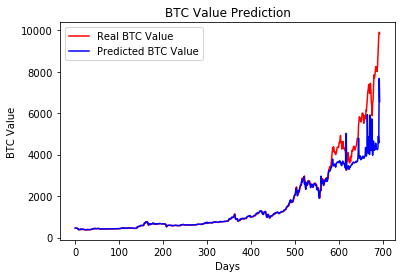

In [123]:

#visualising the result 

plt.plot(ytest, color = 'red', label = 'Real BTC Value')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted BTC Value')
plt.title('BTC Value Prediction')
plt.xlabel('Days')
plt.ylabel('BTC Value')
plt.legend()
plt.show()

In [124]:
from keras.models import load_model
regressor.save('minor_model.h5')


In [128]:
new_model = load_model('minor_model.h5')